In [1]:
import matplotlib.pyplot as plt
import json
import ast

In [44]:
train_path = '../data/spider/train_spider.json'

with open(train_path,'r') as file_val:
    train_res = file_val.read()
train_json = json.loads(train_res)

val_path = '../data/spider/dev.json'

with open(val_path,'r') as file_val:
    input_res = file_val.read()
val_json = json.loads(input_res)

input_json = train_json + val_json

In [45]:
print("Total number of queries in train set: ", len(train_json))
print("Total number of queries in dev set: ", len(val_json))

Total number of queries in train set:  7000
Total number of queries in dev set:  1034


In [46]:
query_lengths = []
text_lengths = []

token_count = {'how_many': 0, 'what': 0, 'which':0, 'list': 0, 'find': 0, 'others': 0}
for i in range(0, len(input_json)):
    query =input_json[i]['query']
    query_lengths.append(len(query))
    text = input_json[i]['question']
    text_lengths.append(len(text))
    first_word = input_json[i]['question_toks'][0].lower()
    second_word = input_json[i]['question_toks'][1].lower()
    if first_word == 'how' and second_word == 'many':
        token_count['how_many'] += 1
    elif  first_word == 'what':
        token_count['what'] += 1
    elif  first_word == 'which':
        token_count['which'] += 1
    elif  first_word == 'list':
        token_count['list'] += 1
    elif  first_word == 'find':
        token_count['find'] += 1
    else:
        token_count['others'] += 1

    

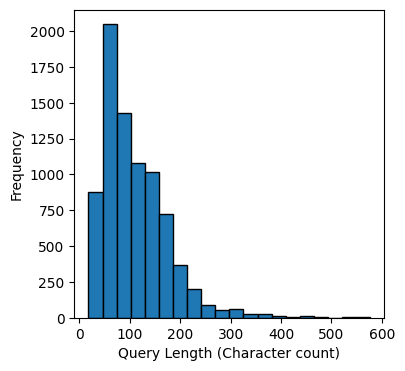

In [47]:
# Plotting query lengths

# Create a smaller figure with customized size
plt.figure(figsize=(4, 4))

# Create the histogram
plt.hist(query_lengths, bins=20, edgecolor='black')
# Set the labels and title
plt.xlabel('Query Length (Character count)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

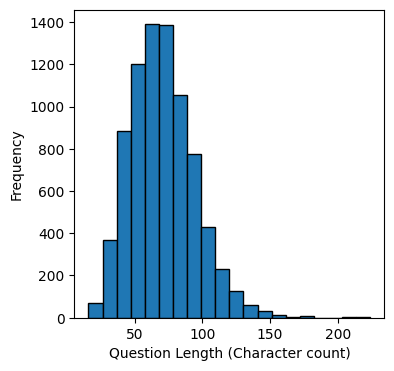

In [48]:
# Plotting question lengths

# Create a smaller figure with customized size
plt.figure(figsize=(4, 4))

# Create the histogram
plt.hist(text_lengths, bins=20, edgecolor='black')
# Set the labels and title
plt.xlabel('Question Length (Character count)')
plt.ylabel('Frequency')


# Show the plot
plt.show()

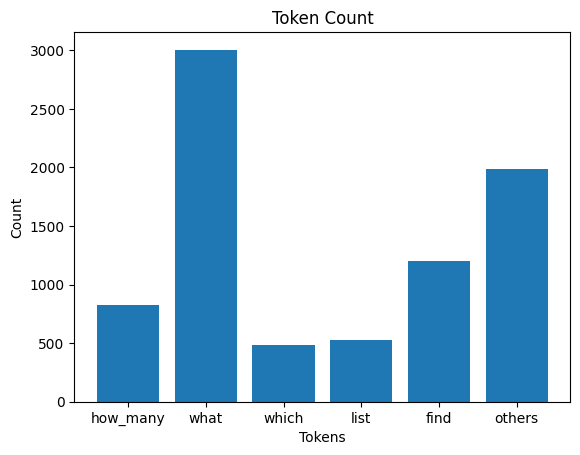

In [49]:
# Distribution of questions

import matplotlib.pyplot as plt

# Extract the keys and values from the dictionary
tokens = list(token_count.keys())
counts = list(token_count.values())

# Create a bar chart
plt.bar(tokens, counts)

# Set the labels and title
plt.xlabel('Tokens')
plt.ylabel('Count')
plt.title('Token Count')

# Show the plot
plt.show()

# Among other we have show, count, return